## Importación de Bibliotecas

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Carga de Datos Limpios

In [45]:
df_compras=pd.read_csv('../data/clean_compras.csv')
df_compras.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED
1,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED
2,112458,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,DFL900423676,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED
3,113412,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EDC011123R22,EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED
4,113412,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EDC011123R22,EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED


In [46]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NUM BEN       1540 non-null   int64  
 1   BENEFICIARIO  1540 non-null   object 
 2   RFC           1540 non-null   object 
 3   FACTURA       1540 non-null   object 
 4   CONTRATO      1540 non-null   object 
 5   CONCEPTO      1540 non-null   object 
 6   TIPO          1540 non-null   object 
 7   # OP          1540 non-null   float64
 8   FECHA         1540 non-null   object 
 9   IMPORTE       1540 non-null   float64
 10  SHEET         1540 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 132.5+ KB


## EDA - Exploratory Data Analysis

In [47]:
df_compras['FECHA'] = pd.to_datetime(df_compras['FECHA'], format='%Y-%m-%d')

In [48]:
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NUM BEN       1540 non-null   int64         
 1   BENEFICIARIO  1540 non-null   object        
 2   RFC           1540 non-null   object        
 3   FACTURA       1540 non-null   object        
 4   CONTRATO      1540 non-null   object        
 5   CONCEPTO      1540 non-null   object        
 6   TIPO          1540 non-null   object        
 7   # OP          1540 non-null   float64       
 8   FECHA         1540 non-null   datetime64[ns]
 9   IMPORTE       1540 non-null   float64       
 10  SHEET         1540 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 132.5+ KB


In [53]:
df_compras.isna().sum()

BENEFICIARIO    0
FACTURA         0
CONTRATO        0
CONCEPTO        0
TIPO            0
# OP            0
FECHA           0
IMPORTE         0
SHEET           0
dtype: int64

In [49]:
df_compras.describe()

,NUM BEN,# OP,FECHA,IMPORTE
count,1540.000000,1.540000e+03,1540,1.540000e+03
mean,203914.777273,1.920050e+08,2020-12-13 11:22:35.844155648,6.263179e+05
min,110152.000000,1.019042e+06,2020-12-01 00:00:00,8.600000e-01
25%,116223.000000,1.019144e+06,2020-12-04 00:00:00,2.987000e+03
50%,203013.000000,2.980000e+08,2020-12-11 00:00:00,1.235584e+04
75%,311250.000000,3.000001e+08,2020-12-22 00:00:00,1.130583e+05
max,370012.000000,6.040001e+08,2020-12-31 00:00:00,1.267303e+08
std,92435.932025,1.411189e+08,NaN,4.666912e+06


In [50]:
df_compras.drop(columns=['NUM BEN', 'RFC'], axis=1, inplace=True)
df_compras.head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED
1,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED
2,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED
3,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED
4,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED


### Analisis Univariado

In [58]:
print(df_compras['SHEET'].value_counts() )
print(df_compras['SHEET'].value_counts(normalize=True))

SHEET
CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: count, dtype: int64
SHEET
CONTRATISTAS Y FDO FED    0.470130
GASTOS VARIOS             0.448052
COMUNICACION              0.046104
SERV. PERS.               0.029870
SERV PPROF                0.005844
Name: proportion, dtype: float64


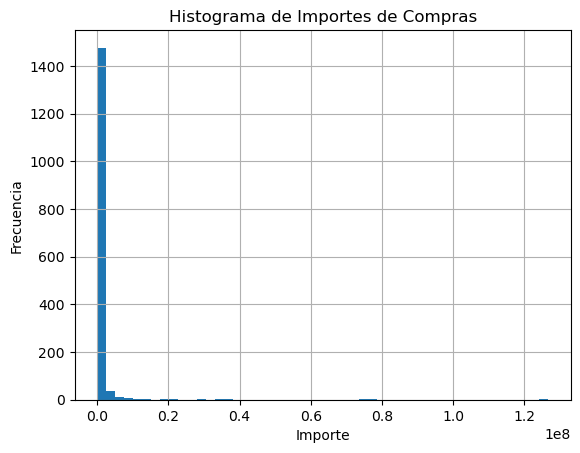

In [59]:
df_compras['IMPORTE'].hist(bins=50)
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.title('Histograma de Importes de Compras')
plt.show()

<Axes: >

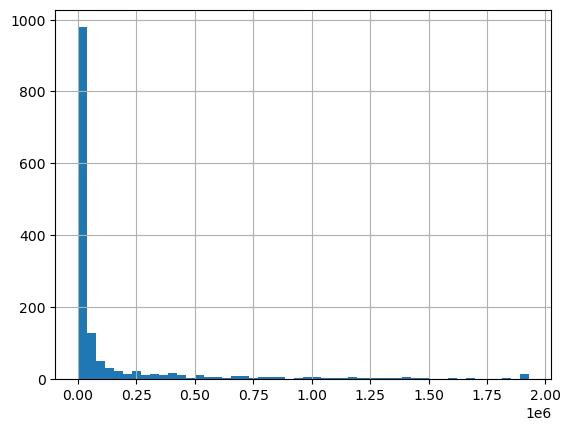

In [62]:
df_compras[df_compras['IMPORTE'] < df_compras['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [63]:
df_compras[df_compras['IMPORTE'] < df_compras['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14036-158003-5341,SADA/CC/185.3/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,18368.04,CONTRATISTAS Y FDO FED
1,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C 14038-158003-5345,SADA/CC/185.2/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,301000037.0,2020-12-04,174432.09,CONTRATISTAS Y FDO FED
2,DISTRIBUIDORA DE FRUTAS Y LEGUMBRES LA HORTALI...,C14046-158003-5661,SADA/CC/205/2020,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000119.0,2020-12-11,175270.39,CONTRATISTAS Y FDO FED
3,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170475-158003-5320,ORDEN DE COMPRA 6541,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,183258.00,CONTRATISTAS Y FDO FED
4,"EMPACADORA Y DISTR.DE CARNES FINAS SAN JUAN,S....",EB170534-158003-5323,ORDEN DE COMPRA 6545,ADQUISICION DE INSUMOS PARA LA ALIMENTACION DE...,TR,300000116.0,2020-12-04,109078.00,CONTRATISTAS Y FDO FED


### Análisis Bivariado

### Análisis Multivariado

### Análisis de Texto

In [ ]:
df